In [5]:
import matplotlib.pyplot as plt

palette = plt.imread('armageddon-tilesets/Palette/Desert.bmp')
palette.shape

FileNotFoundError: [Errno 2] No such file or directory: 'armageddon-tilesets/Palette/Desert.bmp'

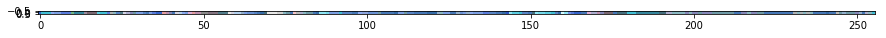

In [2]:
plt.figure(figsize=(15, 1))
plt.imshow(palette);

In [3]:
palette = palette.reshape(-1, 4)

In [4]:
with open('armageddon-tilesets/Data/Desert.pi', 'rb') as file:
    data = file.read()

len(data)

4889624

In [5]:
import numpy as np

paletted_data = np.array(list(map(lambda x: palette[x], data)))

In [6]:
paletted_data[:3200].reshape([-1, 32, 4]).shape

(100, 32, 4)

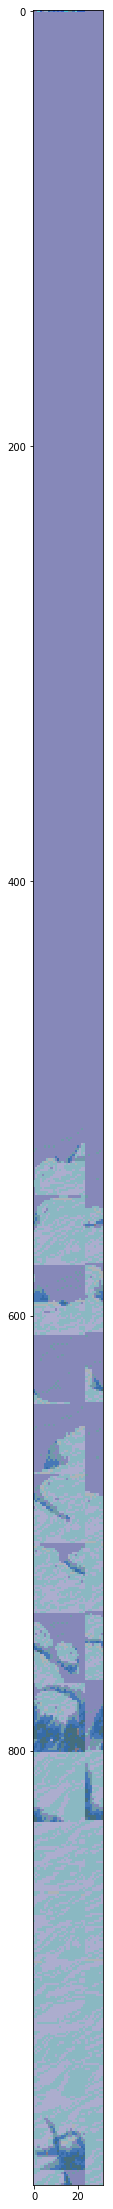

In [7]:
plt.figure(figsize=(4, 40))
plt.imshow(paletted_data[:32000].reshape([-1, 32, 4]));

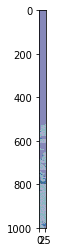

In [8]:
plt.figure(figsize=(4, 4))
plt.imshow(paletted_data[24:32024].reshape([-1, 32, 4]));

In [9]:
with open('armageddon-tilesets/Palette/Desert.pal', 'rb') as file:
    palette = file.read()

palette = np.frombuffer(palette, dtype=np.uint8).reshape([-1, 4])
palette.shape

(256, 4)

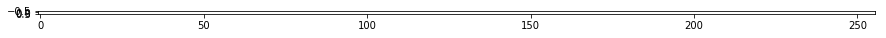

In [10]:
plt.figure(figsize=(15, 1))
plt.imshow(palette.reshape(1, 256, 4));

In [11]:
palette[:20]

array([[  0,   0, 255,   0],
       [  0, 255,   0,   0],
       [  0, 255,   0,   0],
       [  0, 255,   0,   0],
       [160, 185, 255,   0],
       [137, 165, 243,   0],
       [114, 144, 231,   0],
       [ 90, 124, 219,   0],
       [ 67, 103, 207,   0],
       [ 44,  83, 195,   0],
       [ 70, 170,  20,   0],
       [ 38, 143,  11,   0],
       [ 25, 106,   7,   0],
       [ 13,  68,   4,   0],
       [196,   0,   0,   0],
       [162,   0,   0,   0],
       [139,   0,   0,   0],
       [115,   0,   0,   0],
       [ 41, 218, 241,   0],
       [ 46, 179, 228,   0]], dtype=uint8)

In [12]:
palette = palette[:, :3]
palette.shape

(256, 3)

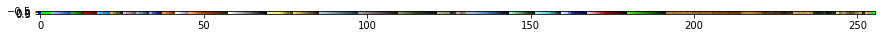

In [13]:
plt.figure(figsize=(15, 1))
plt.imshow(palette.reshape(1, 256, 3));

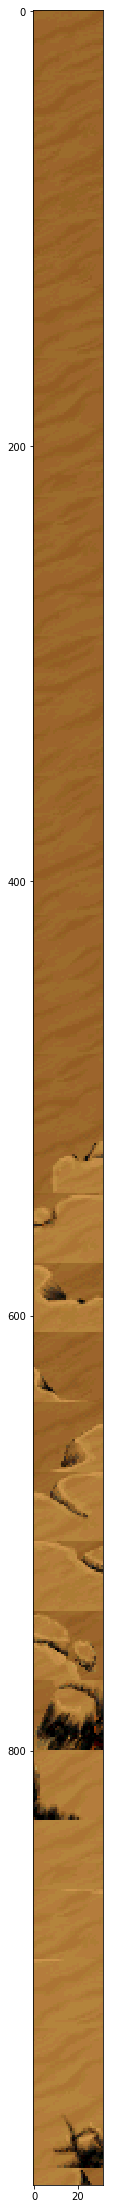

In [14]:
paletted_data = np.array(list(map(lambda x: palette[x], data)))

plt.figure(figsize=(4, 40))
plt.imshow(paletted_data[24:32024].reshape([-1, 32, 3]));

In [15]:
paletted_data = np.array(list(map(lambda x: palette[x], data)))

tiles = paletted_data[24:].reshape([-1, 32, 3])
tiles.shape

(152800, 32, 3)

In [16]:
tile_list = []
for i in range(0, tiles.shape[0], 32):
    tile = tiles[i: i + 32]
    tile_list.append(tile)

len(tile_list)

4775

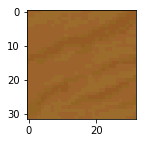

In [17]:
plt.figure(figsize=(2, 2))
plt.imshow(tile_list[0]);

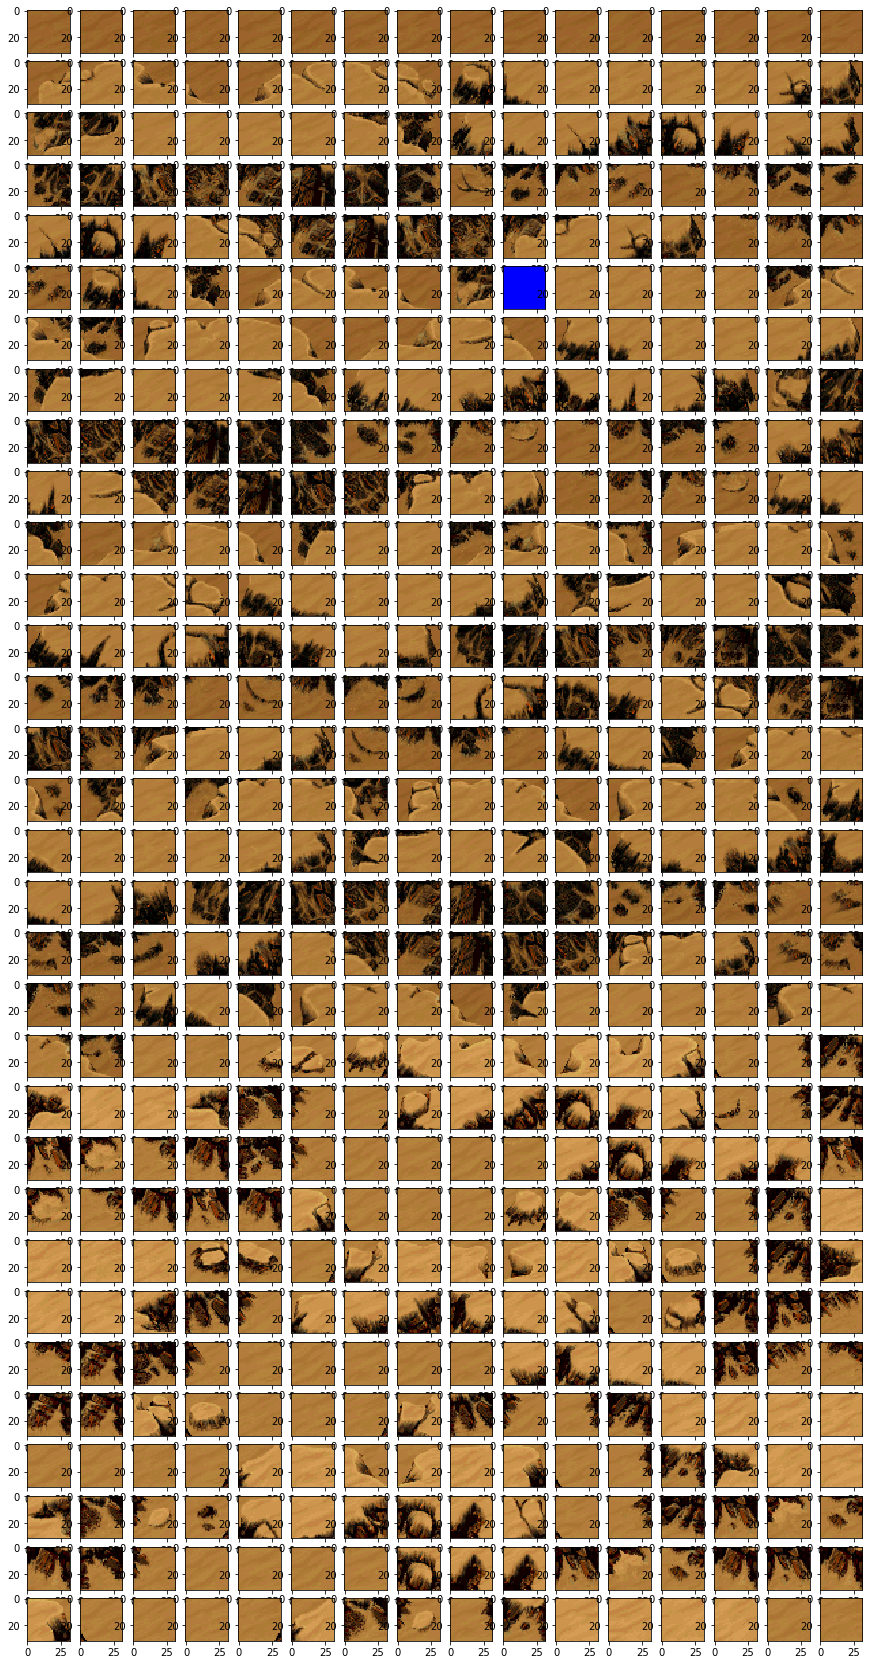

In [18]:
tile_count = len(tile_list)
x = 16
y = 32

plt.figure(figsize=(15, 15 * (y/x)))

for i, tile in enumerate(tile_list[:x * y]):
    plt.subplot(y, x, i + 1)
    plt.imshow(tile)

plt.show()

In [19]:
def read_tileset(name):
    with open('armageddon-tilesets/Data/%s.pi' % name, 'rb') as file:
        data = file.read()

    with open('armageddon-tilesets/Palette/%s.pal' % name, 'rb') as file:
        palette = file.read()
        
    palette = np.frombuffer(palette, dtype=np.uint8).reshape([-1, 4])[:, :3]
    paletted_data = np.array(list(map(lambda x: palette[x], data)))
    tiles = paletted_data[24:].reshape([-1, 32, 3])
    
    tile_list = []
    for i in range(0, tiles.shape[0], 32):
        tile = tiles[i: i + 32]
        tile_list.append(tile)

    return tile_list

def display_tileset(tileset, x, y):
    plt.figure(figsize=(15, 15 * (y/x)))

    for i, tile in enumerate(tileset[:x * y]):
        plt.subplot(y, x, i + 1)
        plt.imshow(tile)

    plt.show()

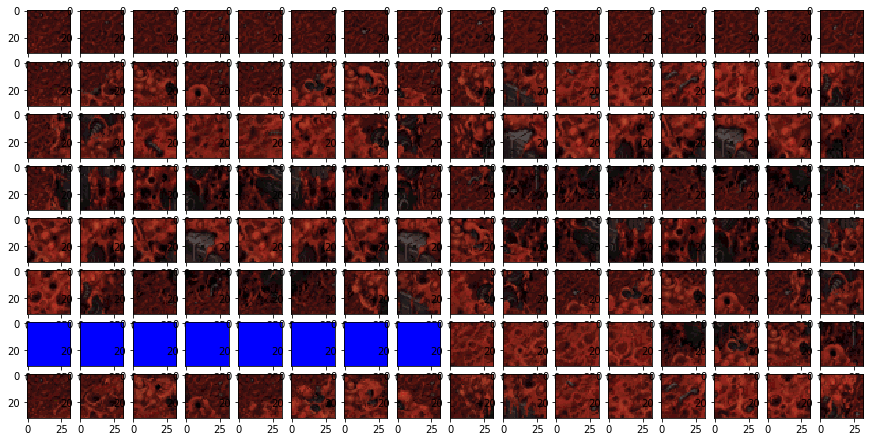

In [20]:
display_tileset(read_tileset('building'), 16, 8)

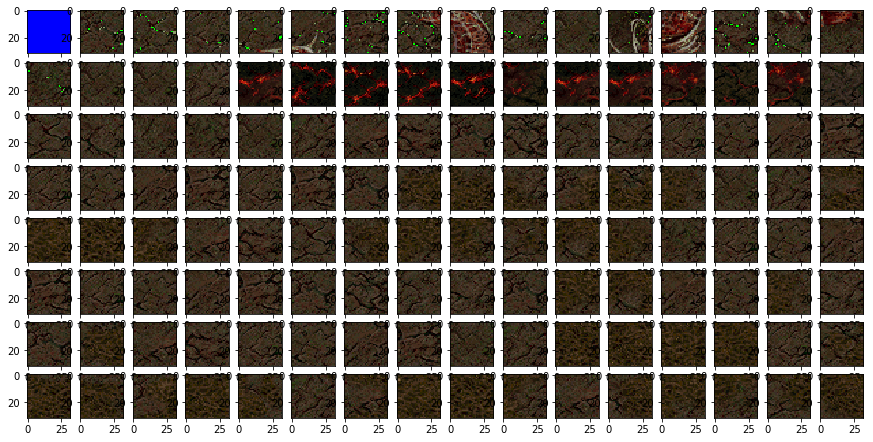

In [21]:
display_tileset(read_tileset('ead'), 16, 8)

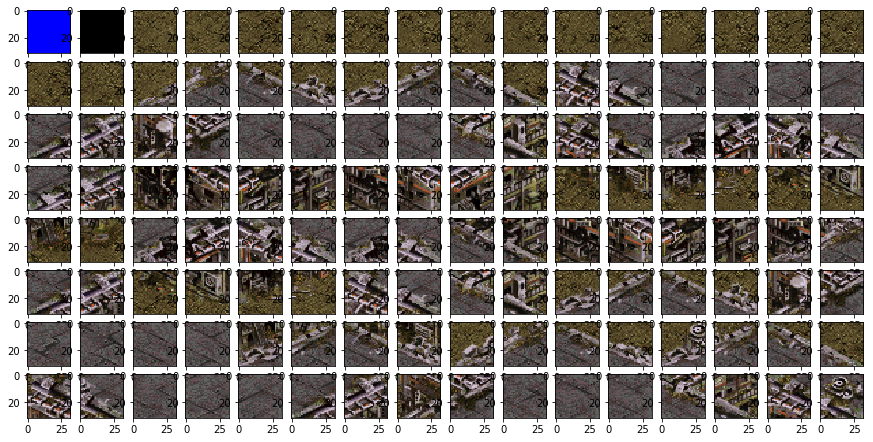

In [22]:
display_tileset(read_tileset('earth'), 16, 8)

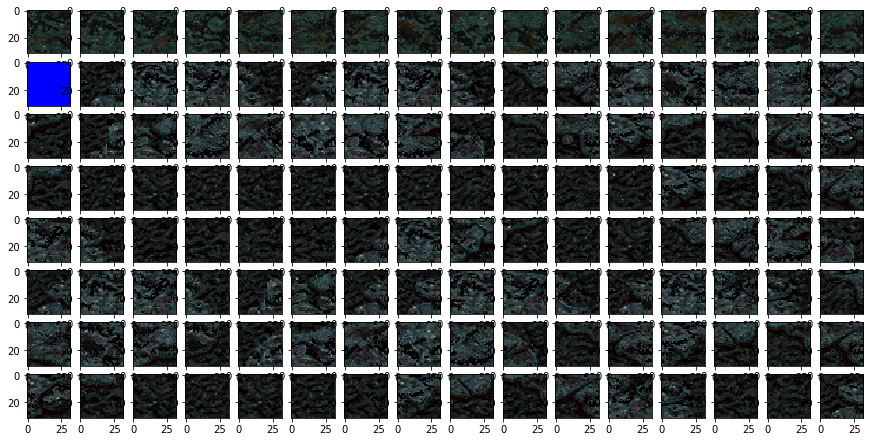

In [23]:
display_tileset(read_tileset('space'), 16, 8)

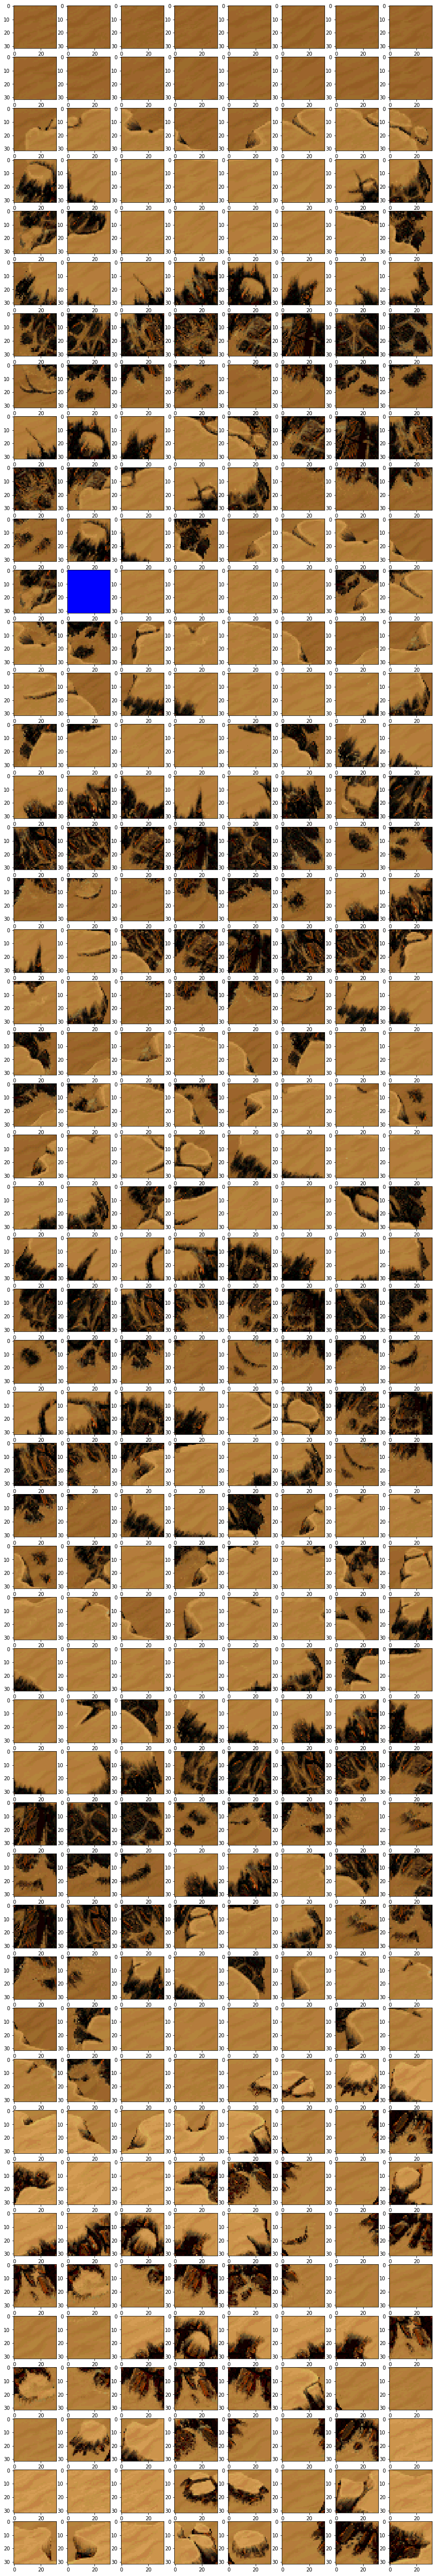

In [24]:
display_tileset(read_tileset('desert'), 8, 50)

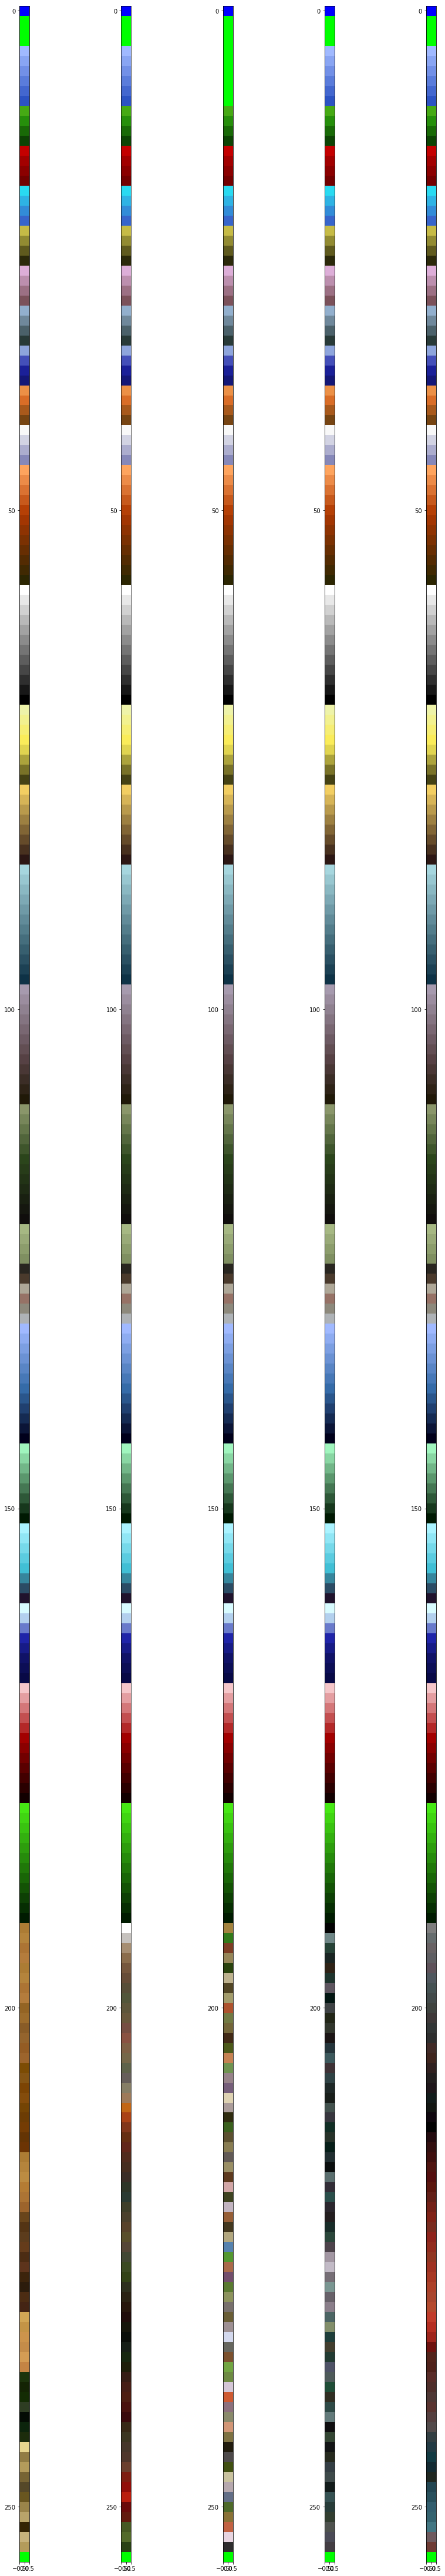

In [25]:
import numpy as np

def red_palette(name):
    with open('../tilesets/armageddon-tilesets/Palette/%s.pal' % name, 'rb') as file:
        palette = file.read()
        return np.frombuffer(palette, dtype=np.uint8).reshape([-1, 1, 4])[:, :, :3]

desert_palette = red_palette('desert')
ead_palette = red_palette('ead')
earth_palette = red_palette('earth')
space_palette = red_palette('space')
building_palette = red_palette('building')

plt.figure(figsize=(15, 80))

plt.subplot(1, 5, 1)
plt.imshow(desert_palette)

plt.subplot(1, 5, 2)
plt.imshow(ead_palette)

plt.subplot(1, 5, 3)
plt.imshow(earth_palette)

plt.subplot(1, 5, 4)
plt.imshow(space_palette)

plt.subplot(1, 5, 5)
plt.imshow(building_palette);

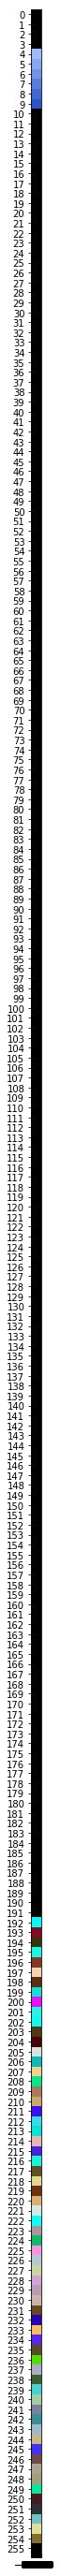

In [27]:
palette_diff = desert_palette - earth_palette
plt.figure(figsize=(15, 50))
plt.locator_params(nbins=256)
plt.imshow(palette_diff);